In [0]:
#The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network

import h5py
import numpy as np

In [0]:
# Data fetching and understand the train/test splits. 
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/Neural Networks/SVHN_single_grey1.h5','r')

In [0]:
list(h5f)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
#
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]

In [0]:
h5f.close()

In [0]:
X_train.shape[0]

42000

In [0]:
X_test.shape[0]

18000

In [0]:
X_train.shape

(42000, 32, 32)

In [0]:
np.unique(y_train1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
import keras
y_train = keras.utils.to_categorical(y_train1)

In [0]:
y_test = keras.utils.to_categorical(y_test1)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1).astype('float32')

In [0]:
X_train.shape

(42000, 32, 32, 1)

In [0]:
X_train /= 255
X_test /= 255

In [0]:
# Implement and apply a deep neural network classifier

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

In [35]:
model1 = Sequential()

#1st Conv layer
model1.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

#MaxPooling
model1.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model1.add(Dropout(0.25))

#Flatten
model1.add(Flatten())

#1st Dense layer
model1.add(Dense(128))
model1.add(Activation('relu'))

#2nd Dense layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

model1.fit(X_train, y_train, nb_epoch=10, batch_size=32,
              validation_data=(X_test, y_test), callbacks=callback_list, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 118s 3ms/step - loss: 1.0220 - acc: 0.6782 - val_loss: 0.6377 - val_acc: 0.8208
Epoch 2/10
42000/42000 [==============================] - 117s 3ms/step - loss: 0.6000 - acc: 0.8204 - val_loss: 0.5295 - val_acc: 0.8484
Epoch 3/10
42000/42000 [==============================] - 117s 3ms/step - loss: 0.5044 - acc: 0.8483 - val_loss: 0.4638 - val_acc: 0.8678
Epoch 4/10
42000/42000 [==============================] - 117s 3ms/step - loss: 0.4360 - acc: 0.8675 - val_loss: 0.4352 - val_acc: 0.8748
Epoch 5/10
42000/42000 [==============================] - 117s 3ms/step - loss: 0.3902 - acc: 0.8809 - val_loss: 0.4142 - val_acc: 0.8809
Epoch 6/10
42000/42000 [==============================] - 117s 3ms/step - loss: 0.3462 - acc: 0.8963 - val_loss: 0.4017 - val_acc: 0.8858
Epoch 7/10
42000/42000 [==============================] - 117s 3ms/step - loss: 0.3015 - acc: 0.9074 - val_loss: 0.4073 - 

In [0]:
# Implement batch normalization for training the neural network 

from keras.layers import BatchNormalization

In [38]:
model2 = Sequential()

#1st Conv layer
model2.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

#MaxPooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model2.add(Dropout(0.25))

#Flatten
model2.add(Flatten())

#1st Dense layer
model2.add(Dense(128))
model2.add(Activation('relu'))

model2.add(BatchNormalization())

#2nd Dense layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

history = model2.fit(X_train, y_train, nb_epoch=10, batch_size=32,
              validation_data=(X_test, y_test), callbacks=callback_list, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 120s 3ms/step - loss: 0.8629 - acc: 0.7294 - val_loss: 0.5396 - val_acc: 0.8423
Epoch 2/10
42000/42000 [==============================] - 120s 3ms/step - loss: 0.5256 - acc: 0.8390 - val_loss: 0.4433 - val_acc: 0.8671
Epoch 3/10
42000/42000 [==============================] - 120s 3ms/step - loss: 0.4631 - acc: 0.8565 - val_loss: 0.4465 - val_acc: 0.8665
Epoch 4/10
42000/42000 [==============================] - 120s 3ms/step - loss: 0.4148 - acc: 0.8697 - val_loss: 0.4001 - val_acc: 0.8824
Epoch 5/10
42000/42000 [==============================] - 119s 3ms/step - loss: 0.3747 - acc: 0.8836 - val_loss: 0.3764 - val_acc: 0.8906
Epoch 6/10
42000/42000 [==============================] - 119s 3ms/step - loss: 0.3494 - acc: 0.8912 - val_loss: 0.3963 - val_acc: 0.8814
Epoch 7/10
42000/42000 [==============================] - 119s 3ms/step - loss: 0.3274 - acc: 0.8974 - val_loss: 0.3691 - 

In [37]:
# Print the classification accuracy metrics 

loss_and_metrics = model2.evaluate(X_test, y_test)
print(loss_and_metrics)

18000/18000 [==============================] - 10s 568us/step
[0.350224200103018, 0.9003333333333333]


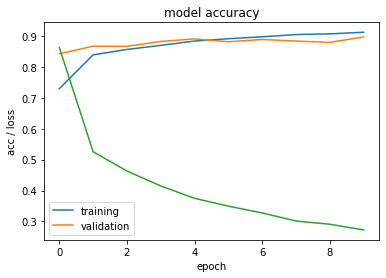

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('acc / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()